In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import csv, json

In [3]:
# read in csv file
df = pd.read_csv("Resources/Final_new_draft.csv")
df

,Unnamed: 0,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,nba team,team_y,year_y,ROUND NUMBER,ROUND PICK
0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,NaN,NaN,NaN
1,1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,...,0.1429,0.0000,3.2857,Wing G,7.67089,NaN,NaN,NaN,NaN,NaN
2,2,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,NaN,NaN,NaN
3,3,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.5938,0.2188,8.7812,Combo G,7.30085,NaN,NaN,NaN,NaN,NaN
4,4,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,...,0.2121,0.0909,8.6667,Combo G,9.66297,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61066,61066,Kamron Battle,Northern Illinois,MAC,2,0.5,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61067,61067,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,...,0.0000,0.0000,0.0000,C,0.00000,NaN,NaN,NaN,NaN,NaN
61068,61068,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61069,61069,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN


In [4]:
# changing draft status to number
df.loc[df['draft_status'] == "Undrafted", 'draft_status'] = 0
df.loc[df['draft_status'] == "Drafted", 'draft_status'] = 1
df['draft_status'].head(78)

0     0
1     0
2     0
3     0
4     0
     ..
73    1
74    1
75    1
76    0
77    0
Name: draft_status, Length: 78, dtype: object

In [5]:
# dropping nulls
droppedstats = df.dropna(axis=0, subset=["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"])
droppedstats

,Unnamed: 0,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,nba team,team_y,year_y,ROUND NUMBER,ROUND PICK
0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,NaN,NaN,NaN
1,1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,...,0.1429,0.0000,3.2857,Wing G,7.67089,NaN,NaN,NaN,NaN,NaN
2,2,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,NaN,NaN,NaN
3,3,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.5938,0.2188,8.7812,Combo G,7.30085,NaN,NaN,NaN,NaN,NaN
4,4,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,...,0.2121,0.0909,8.6667,Combo G,9.66297,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61066,61066,Kamron Battle,Northern Illinois,MAC,2,0.5,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61067,61067,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,...,0.0000,0.0000,0.0000,C,0.00000,NaN,NaN,NaN,NaN,NaN
61068,61068,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61069,61069,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN


In [6]:
# taking counts of who has been drafted
droppedstats["draft_status"].value_counts()

0    59626
1     1445
Name: draft_status, dtype: int64

In [7]:
# changing draft_status column to integer
draftstatus = droppedstats['draft_status'].astype(int)

In [8]:
# forming X and y values
stats = ["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"]
X = droppedstats[stats]
y = draftstatus

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# create a logistic regression model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [11]:
# fit the model to the data
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
# confusion matrix for logistic regression new stats
predictions = classifier.predict(X_test_scaled)
confusion_matrix(y_test, predictions)

array([[14885,    26],
       [  299,    58]], dtype=int64)

In [13]:
# classification report for logistic regression with new stats
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.69      0.16      0.26       357

    accuracy                           0.98     15268
   macro avg       0.84      0.58      0.63     15268
weighted avg       0.97      0.98      0.97     15268



In [14]:
# print the accuracy score for the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9773377289697182
Testing Data Score: 0.978713649462929


In [15]:
# fit to random forest
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

In [16]:
# confusion matrix for random forest
pred_rfc = rfc.predict(X_test_scaled)
confusion_matrix(y_test, pred_rfc)

array([[14880,    31],
       [  285,    72]], dtype=int64)

In [17]:
# classification report for random forest
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.70      0.20      0.31       357

    accuracy                           0.98     15268
   macro avg       0.84      0.60      0.65     15268
weighted avg       0.97      0.98      0.97     15268



In [18]:
# random forest model scores
score1= rfc.score(X_train_scaled, y_train)
score2 =rfc.score(X_test_scaled, y_test)
print(f"Training Data Score: {score1}")
print(f"Testing Data Score: {score2}")

Training Data Score: 1.0
Testing Data Score: 0.9793031176316479


[0.09375669 0.08972434 0.08315478 0.0858843  0.07883422 0.08127901
 0.09615611 0.08298512 0.17198087 0.13624455]


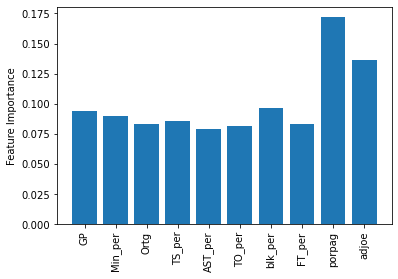

In [19]:
# visualizing most important features of model
features = rfc.feature_importances_
print(features)
plt.bar(x=range(len(features)), height=features)
plt.xticks(np.arange(10), ["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"], rotation=90)

plt.ylabel("Feature Importance")
plt.show()

In [20]:
#fresh = df.loc[df['yr']=="Fr"]
#soph = df.loc[df['yr']=="So"]
#junior = df.loc[df['yr']=="Jr"]
#senior = df.loc[df['yr']=="Sr"]

In [21]:
# read in 2022 college players csv
testingfilepath = "Resources/Potential_Draft.csv"
potentialdraft_df= pd.read_csv(testingfilepath)
potentialdraft_df.head()

,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,...,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
1,1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,...,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
2,2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,...,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G,0.284581
3,3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,...,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4,10.140700
4,4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,...,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F,2.562430


In [22]:
# view draft_status column
potentialdraft_df["draft_status"]

0       Undrafted
1       Undrafted
2       Undrafted
3       Undrafted
4       Undrafted
          ...    
3973    Undrafted
3974    Undrafted
3975    Undrafted
3976    Undrafted
3977    Undrafted
Name: draft_status, Length: 3978, dtype: object

In [23]:
# changing draft_status column to numbers
potentialdraft_df.loc[potentialdraft_df['draft_status'] == "Undrafted", 'draft_status'] = 0
potentialdraft_df.loc[potentialdraft_df['draft_status'] == "Drafted", 'draft_status'] = 1
potentialdraft_df['draft_status']

0       0
1       0
2       0
3       0
4       0
       ..
3973    0
3974    0
3975    0
3976    0
3977    0
Name: draft_status, Length: 3978, dtype: object

In [24]:
# dropping nulls
predroppedstats =potentialdraft_df.dropna(axis=0, subset=["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"])
predroppedstats

,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,...,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
1,1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,...,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
2,2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,...,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G,0.284581
3,3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,...,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4,10.140700
4,4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,...,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F,2.562430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,3973,Aquan Smart,FIU,CUSA,21,11.7,69.4,17.7,32.1,36.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3974,3974,Chase Barrs,Florida A&M,SWAC,14,11.0,85.1,8.8,42.9,40.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3975,3975,Hugo Clarkin,Sacramento St.,BSky,16,22.8,99.7,7.8,70.6,68.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3976,3976,James Graham III,Maryland,B10,7,1.8,9.4,17.1,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# creating csv from updated 2022 players dataframe
predroppedstats.to_csv("Cleaned2022.csv")

In [24]:
# predicting 2022 college players using Random Forest model
stats = ["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"]
new_test = predroppedstats[stats]
scaler2 = StandardScaler().fit(X_train)
new_test_scaled = scaler2.transform(new_test)
draftpredictions = rfc.predict_proba(new_test_scaled)
draftpredictions

array([[1.   , 0.   ],
       [0.984, 0.016],
       [0.98 , 0.02 ],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ]])

In [25]:
# create dataframe for predicted draft players
Output = pd.DataFrame(draftpredictions, columns=["Nodraft","Yesdraft"])
Output["Player"] = predroppedstats["player_name"]
Output["Team"] = predroppedstats["team"]
Output["Conference"] = predroppedstats["conf"]

In [26]:
#check datatypes
Output.dtypes

Nodraft       float64
Yesdraft      float64
Player         object
Team           object
Conference     object
dtype: object

In [27]:
# view dataframe
Output

,Nodraft,Yesdraft,Player,Team,Conference
0,1.000,0.000,Isaiah Felder,South Carolina St.,MEAC
1,0.984,0.016,Jalen Coleman-Lands,Kansas,B12
2,0.980,0.020,K.J. Walton,Akron,MAC
3,0.980,0.020,Jeriah Horne,Tulsa,Amer
4,0.998,0.002,Eric Curry,Minnesota,B10
...,...,...,...,...,...
3973,1.000,0.000,Aquan Smart,FIU,CUSA
3974,1.000,0.000,Chase Barrs,Florida A&M,SWAC
3975,1.000,0.000,Hugo Clarkin,Sacramento St.,BSky
3976,1.000,0.000,James Graham III,Maryland,B10


In [33]:
# set index column as "id"
Output.index.name = 'id'

<AxesSubplot:>

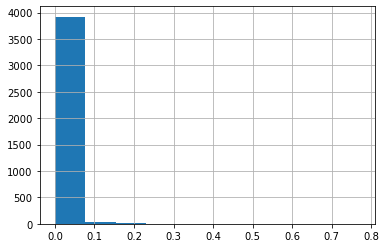

In [34]:
# visualizing relative draftability
pd.Series(rfc.predict_proba(new_test_scaled)[:,1]).hist()

In [35]:
#0.97 yields us approximately 60(ish) drafted players 
(Output["Yesdraft"]> 0.075).value_counts()

False    3916
True       62
Name: Yesdraft, dtype: int64

In [36]:
# creating csv from dataframe
Output.to_csv("DraftProbabilities.csv")